# Solving equations: Newton for several variables

## [Michel Bierlaire](https://people.epfl.ch/michel.bierlaire), EPFL.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We implement Newton's method to find the solution of a system of equations with several unknowns. This is Algorithm 7.3 in <a href="http://optimizationprinciplesalgorithms.com/">Bierlaire (2015) Optimization: principles and algorithms, EPFL Press.</a>

In [2]:
def newtonSeveralVariables(fct, x0, eps, maxiters = 100):
    """
    :param fct: function that returns the value of the function and its Jacobian
    :type fct: function
    
    :param x0: starting point for the algorithm. 
    :type x0: numpy.array
    
    :param eps: precision to reach.
    :type eps: float.
    
    :param maxiters: maximum number of iterations. Default: 100.
    :type maxiters: int
    
    :return: x, message, where x is the last value generated by the algorithm, and message the reason why it stopped. 
    """
    k = 0
    x = x0
    f, J = fct(x)
    while np.linalg.norm(f) > eps and k <= maxiters:
        k += 1
        try:    
            d = np.linalg.solve(J, -f)
            x = x + d
        except LinAlgError as e:
            message = f'Numerical issue encountered in iteration {k}: {e}'
            return None, message
        f, J = fct(x)

    if np.linalg.norm(f) <= eps:
        return x, f'Required precision has been reached: {np.linalg.norm(f)} <= {eps}'
    else:
        return None, f'Maximum number of iterations reached: {maxiters}'    
    

Consider the system of equations \\[ F(x) =\left( \begin{array}{c} x_1^3 - 3x_1x_2^2 -1 \\ x_2^3 - 3x_1^2 x_2 \end{array} \right) =0.\\]
It has three roots: \\[ x^\star(b)= \left( \begin{array}{c} 1 \\ 0 \end{array} \right), \quad x^\star(g)= \left( \begin{array}{c} -1/2 \\ \sqrt{3}/2 \end{array} \right), \quad x^\star(w)= \left( \begin{array}{c}  -1/2 \\ -\sqrt{3}/2 \end{array} \right). \\]

We apply Newton's method to this problem, starting from different points. To visualize the process, we take on the following convention:
1. if Newton's method, when starting from the point $x_0$, converges toward the solution $x^\star(b)$, the point $x_0$ is colored in red;
2. if Newton's method, when starting from the point $x_0$, converges toward the solution $x^\star(g)$, the point $x_0$ is colored in blue;
3. if Newton's method, when starting from the point $x_0$, converges toward the solution $x^\star(w)$, the point $x_0$ is colored in yellow;



In [3]:
def func(x):
    f = np.array([x[0]**3 - 3 * x[0] * x[1]**2 - 1, 
                  x[1]**3 - 3 * x[0]**2 * x[1]])
    J = np.array([[3 * x[0]**2 - 3 * x[1]**2, 
                   -6 * x[0] * x[1]],
                  [-6 * x[0] * x[1], 
                   3 * x[1]**2 - 3 * x[0]**2]])
    return f, J

We first test the algorithm from an arbitrary starting point

In [4]:
eps = 1.0e-15
x0 = np.array([-2, -2])
x, message = newtonSeveralVariables(func, x0, eps, 100)
print(f'Solution: {x} Diagnostic: {message}')

Solution: [-0.5       -0.8660254] Diagnostic: Required precision has been reached: 4.965068306494546e-16 <= 1e-15


We now define a function that starts the algorithm from various points, and color the starting point according to the root that is found. 

In [5]:
def color(x0):
    xb = np.array([1, 0])
    xg = np.array([-0.5, np.sqrt(3) / 2])
    xw = np.array([-0.5, -np.sqrt(3) / 2])
    
    f, J = func(x0)
    if np.linalg.det(J) == 0:
        return 'black'
    x, message = newtonSeveralVariables(func, x0, eps, 100)
    if x is None:
        return 'black'
        
    if np.linalg.norm(x - xb) <= eps:
        return('red')
    if np.linalg.norm(x - xg) <= eps:
        return('blue')
    if np.linalg.norm(x - xw) <= eps:
        return('yellow')
    return 'black' 

In [6]:
def fractal(xrange, yrange, resolution):
    x1 = np.linspace(xrange[0], xrange[1], num=resolution)
    x2 = np.linspace(yrange[0], yrange[1], num=resolution)

    eps = 1.0e-15
    for i in x1:
        for j in x2:
            x0 = np.array([i, j])
            c = color(x0) 
            plt.scatter(x0[0], x0[1], c = c)

    plt.xlim(xrange[0], xrange[1])
    plt.ylim(yrange[0], yrange[1])
    plt.show()

Increase the resolution to obtain a better picture.
Decrease the resolution to calculate faster.

In [7]:
resolution = 150

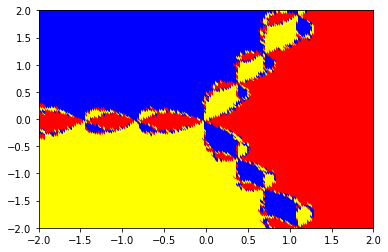

CPU times: user 10min 58s, sys: 1min 22s, total: 12min 20s
Wall time: 4min 23s


In [8]:
%%time
xrange = -2, 2
yrange = -2, 2
fractal(xrange, yrange, resolution)

The object that is plotted is called "Newton's fractal". Zooming in a different region provides different patterns. 

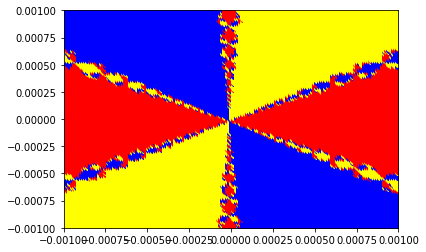

CPU times: user 12min 2s, sys: 1min 29s, total: 13min 32s
Wall time: 4min 47s


In [9]:
%%time
xrange = -0.001, 0.001
yrange = -0.001, 0.001
fractal(xrange, yrange, resolution)